In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
% matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,'Number of houses')

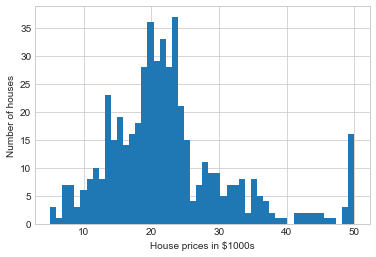

In [6]:
plt.hist(boston.target, bins=50)
plt.xlabel('House prices in $1000s')
plt.ylabel('Number of houses')

Text(0,0.5,'House price in $1000s')

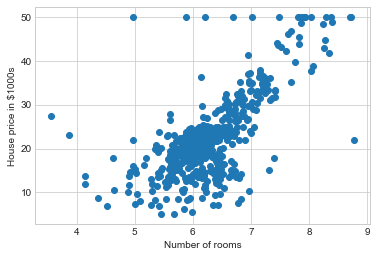

In [7]:
plt.scatter(boston.data[:,5],boston.target)
plt.xlabel('Number of rooms')
plt.ylabel('House price in $1000s')

In [8]:
boston_df = DataFrame(boston.data)

In [9]:
boston_df.columns = boston.feature_names

In [10]:
boston_df['Price'] = boston.target

In [11]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Text(3.675,0.5,'House price in $1000s')

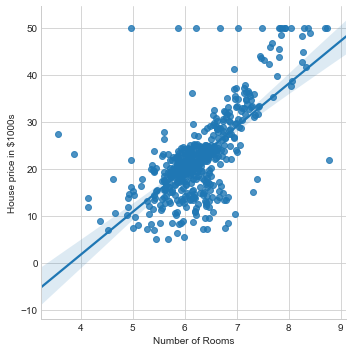

In [12]:
sns.lmplot('RM','Price',data=boston_df)
plt.xlabel('Number of Rooms')
plt.ylabel('House price in $1000s')

In [13]:
X = np.vstack(boston_df.RM)
Y = boston_df.Price

In [14]:
X = np.array([[value,1] for value in X])

In [15]:
m, b = np.linalg.lstsq(X,Y)[0]

C:\Users\lewis\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


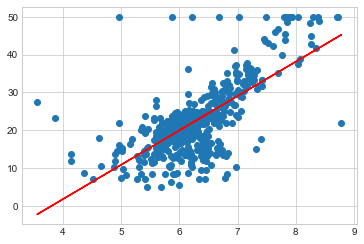

In [16]:
plt.plot(boston_df.RM, boston_df.Price, 'o')

x = boston_df.RM
plt.plot(x, m*x + b, 'r', label='Best Fit Line')

In [17]:
result = np.linalg.lstsq(X,Y)

error_total = result[1]

error_total

C:\Users\lewis\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([22061.87919621])

In [27]:
rmse = np.sqrt(error_total/len(X))

print(' The root mean square error was %.2f.' %rmse )

 The root mean square error was 6.60.


In [28]:
import sklearn

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [29]:
x_multi = boston_df.drop('Price',1)

y_target = boston_df.Price

lreg.fit(x_multi, y_target)

print('The intercept for the model is %.2f' %lreg.intercept_)

print('The number of coefficients used in the model is %d' %len(lreg.coef_))

The intercept for the model is 36.49
The number of coefficients used in the model is 13


In [30]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimates'] = Series(lreg.coef_)

coeff_df


,Features,Coefficient Estimates
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [32]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, boston_df.Price)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [35]:
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print('Using X_train to fit the model, the MSE with Y_train is %.2f' %np.mean((Y_train - pred_train)**2))
print('Using X_train to fit the model, the MSE with X_test and Y_test is %.2f' %np.mean((Y_test - pred_test)**2))

Using X_train to fit the model, the MSE with Y_train is 43.79
Using X_train to fit the model, the MSE with X_test and Y_test is 43.70


Text(0.5,1,'Residual Plots')

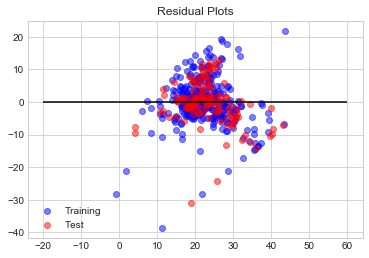

In [38]:
train = plt.scatter(pred_train, (pred_train - Y_train), c='b', alpha=0.5)

test = plt.scatter(pred_test, (pred_test - Y_test), c='r', alpha=0.5)

plt.hlines(y=0, xmin=-20, xmax=60)

plt.legend((train, test),('Training', 'Test'), loc='lower left')

plt.title('Residual Plots')